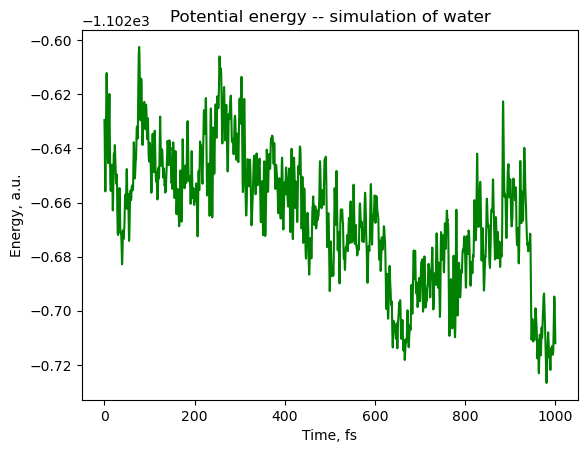

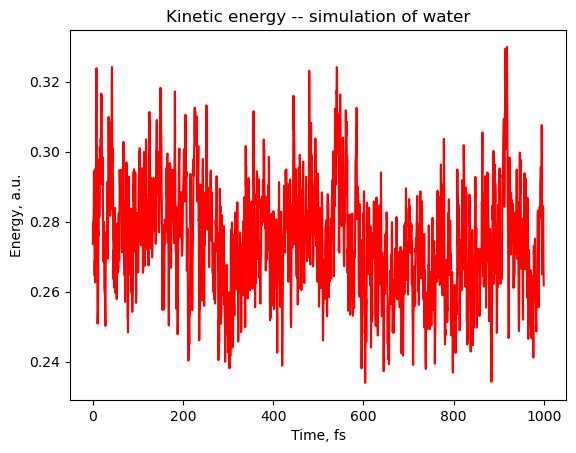

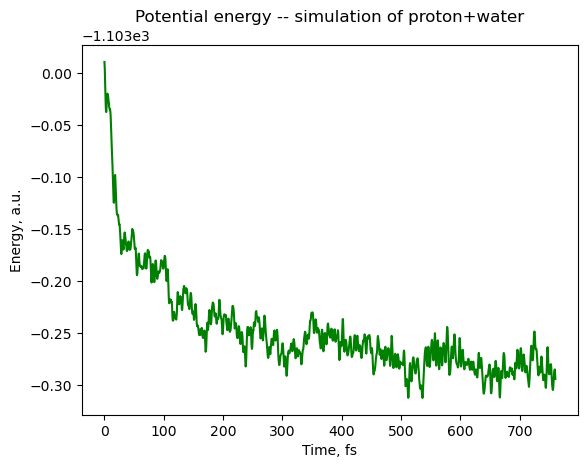

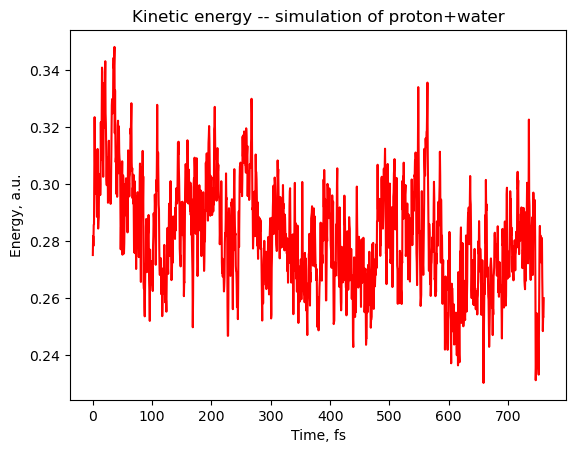

In [41]:
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd
import MDAnalysis.analysis.rdf as rdf
import matplotlib.pyplot as plt
import numpy as np
import os

data = np.loadtxt('Runs/Water/water_aimd_1ps_every0.5fs-1.ener',skiprows=1)

K = data[:,2]
U = data[:,4]

time = data[:,0]*0.5 #in fs

plt.figure()
plt.plot(time, U, color='green')
plt.xlabel("Time, fs")
plt.ylabel("Energy, a.u.")
plt.title('Potential energy -- simulation of water')
plt.show()

plt.figure()
plt.plot(time, K, color='red')
plt.xlabel("Time, fs")
plt.ylabel("Energy, a.u.")
plt.title('Kinetic energy -- simulation of water')
plt.show()

data = np.loadtxt('Runs/Proton/proton_aimd_1ps_every0.5fs-1.ener',skiprows=1)

K = data[:,2]
U = data[:,4]

time = data[:,0]*0.5 #in fs

plt.figure()
plt.plot(time, U, color='green')
plt.xlabel("Time, fs")
plt.ylabel("Energy, a.u.")
plt.title('Potential energy -- simulation of proton+water')
plt.show()

plt.figure()
plt.plot(time, K, color='red')
plt.xlabel("Time, fs")
plt.ylabel("Energy, a.u.")
plt.title('Kinetic energy -- simulation of proton+water')
plt.show()

In [55]:
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd
import MDAnalysis.analysis.rdf as rdf
import matplotlib.pyplot as plt
import numpy as np
import os

import MDAnalysis.transformations as trans

BOX = 12.42
dim = [12.42, 12.42, 12.42, 90, 90, 90]
transform = trans.boxdimensions.set_dimensions(dim)

u = mda.Universe("Runs/Water/water.xyz","Runs/Water/water_aimd_1ps_every0.5fs-pos-1.xyz")
u.trajectory.add_transformations(transform)

ag = u.atoms.select_atoms('name O')

rdf_O = rdf.InterRDF(ag, ag, nbins = 50)
rdf_O.run()

BOX = 12.42
dim = [12.42, 12.42, 12.42, 90, 90, 90]
transform = trans.boxdimensions.set_dimensions(dim)

u_proton = mda.Universe("Runs/Proton/proton.xyz","Runs/Proton/proton_aimd_1ps_every0.5fs-pos-1.xyz")
u_proton.trajectory.add_transformations(transform)

ag_proton = u_proton.atoms.select_atoms('name O')

rdf_O_proton = rdf.InterRDF(ag_proton, ag_proton, nbins = 50)
rdf_O_proton.run()

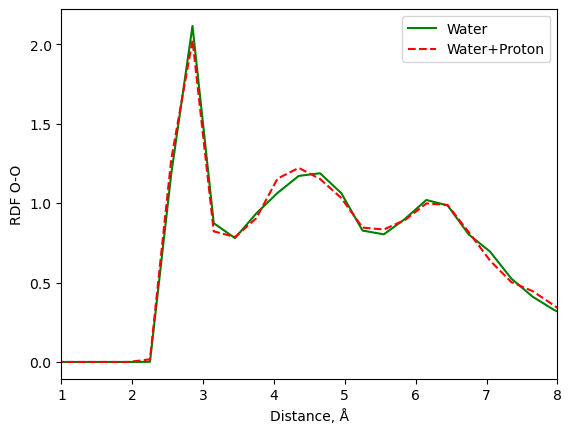

In [56]:
plt.figure()
plt.plot(rdf_O.results.bins[1:],rdf_O.results.rdf[1:],color='green',ls='-',label='Water')

plt.plot(rdf_O_proton.results.bins[1:],rdf_O_proton.results.rdf[1:],color='red',ls='--',label='Water+Proton')

plt.xlabel('Distance, Å')
plt.ylabel('RDF O-O')
plt.xlim([1,8])
plt.legend()